In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as creature
import matplotlib.path as mpath
import cmocean as co
import cartopy.mpl.ticker as cticker
import seaborn as sns
import matplotlib.ticker as mticker
from pyproj import Transformer

theta = np.linspace(0, 2*np.pi, 100)
map_circle = mpath.Path(np.vstack([np.sin(theta), np.cos(theta)]).T * 0.5 + [0.5, 0.5])

In [21]:
# bisicles output
bike = xr.open_dataset('/gws/nopw/j04/terrafirma/nicdet/explore/bike.nc')
# cf_grid_bisicles
bike_grid = xr.open_dataset('/gws/nopw/j04/terrafirma/nicdet/explore/cf_gridfile_BISICLES_lev2.nc')

In [15]:
prefix = bike.keys()
bike[prefix] = bike[prefix].where(bike[prefix]!=0)

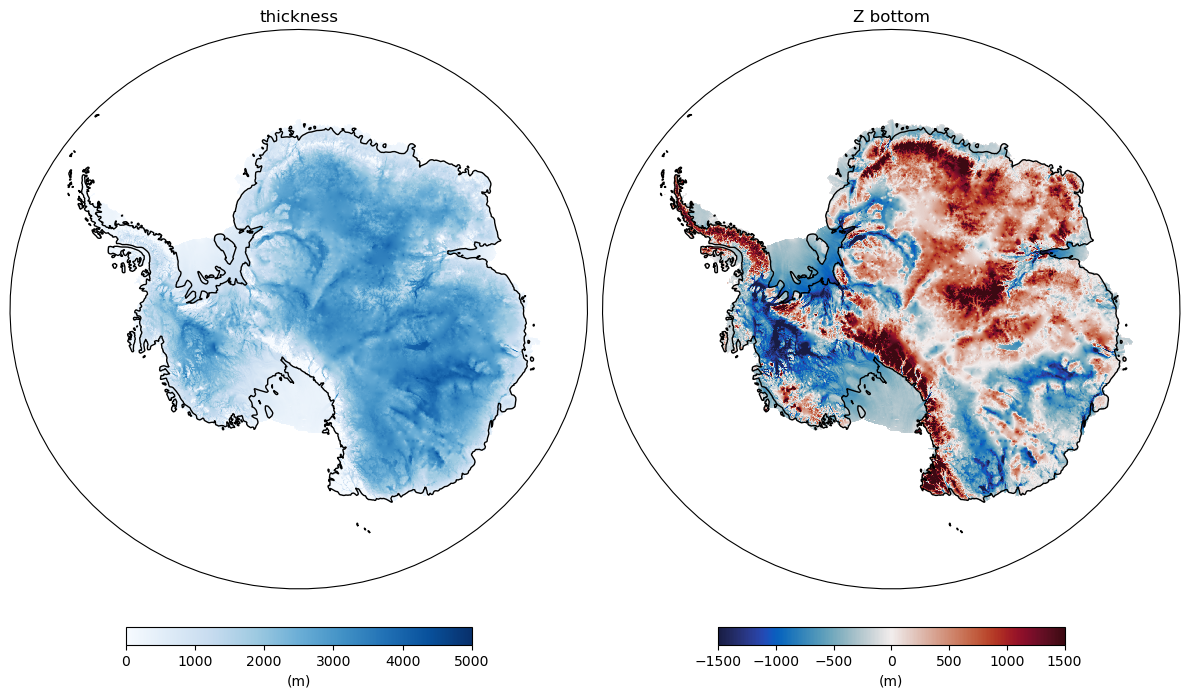

In [21]:
fig, axes = plt.subplots(1,2, subplot_kw={'projection': ccrs.SouthPolarStereo()}, figsize=(12, 8), layout='tight')

for ax in axes:
    ax.set_extent([160, -150, -90, -60], ccrs.PlateCarree())
    ax.coastlines()
    ax.set_boundary(map_circle, transform=ax.transAxes)

a = axes[0].pcolormesh(bike_grid.longitude, bike_grid.latitude, bike.thickness, transform=ccrs.PlateCarree(), cmap='Blues', vmin=0, vmax=5000)
axes[0].set_title('thickness')

b = axes[1].pcolormesh(bike_grid.longitude, bike_grid.latitude, bike.Z_bottom, transform=ccrs.PlateCarree(), cmap=co.cm.balance, vmin=-1500, vmax=1500)
axes[1].set_title('Z bottom')

cbar_a = fig.colorbar(a, ax=axes[0], orientation='horizontal', pad=0.05, shrink=.6)
cbar_a.set_label('(m)')

cbar_b = fig.colorbar(b, ax=axes[1], orientation='horizontal', pad=0.05, shrink=.6)
cbar_b.set_label('(m)')

In [ ]:
bike['Z_bottom'] = bike['Z_bottom'].where(xl_2d <= 180,0)

In [ ]:
fig, axes = plt.subplots(1,2, subplot_kw={'projection': ccrs.SouthPolarStereo()}, figsize=(12, 8), layout='tight')

for ax in axes:
    ax.set_extent([160, -150, -90, -60], ccrs.PlateCarree())
    ax.coastlines()
    ax.set_boundary(map_circle, transform=ax.transAxes)

a = axes[0].pcolormesh(xl_2d, yl_2d, bike.Z_bottom, transform=ccrs.PlateCarree(), cmap=co.cm.balance, vmin=-1000, vmax=1000)
axes[0].set_title('thickness');

In [ ]:
bike.to_netcdf("plotfile_updated.h5", format="NETCDF4")

In [1]:
import h5py
import numpy as np
from netCDF4 import Dataset

In [81]:
# Load NetCDF variable
nc_file = Dataset("/gws/nopw/j04/terrafirma/nicdet/explore/bike.nc", "r")
z_bottom = nc_file.variables["Z_bottom"][:]


In [28]:
# Load HDF5 file
h5_file = h5py.File("/gws/nopw/j04/terrafirma/nicdet/explore/bisicles_dc575c_22790101_plot-AIS.hdf5", "r+")

In [42]:
# Get info
data = h5_file["level_2/data:datatype=0"]
offsets = h5_file["level_2/data:offsets=0"][:]
comps = h5_file["level_2/data_attributes/components"][()]

KeyError: "Unable to synchronously open object (object 'components' doesn't exist)"

In [43]:
level["data_attributes"].attrs["comps"]

NameError: name 'level' is not defined

In [41]:
with h5py.File("/gws/nopw/j04/terrafirma/nicdet/explore/bisicles_dc575c_22790101_plot-AIS.hdf5", "r") as f:
    for k, v in f.attrs.items():
        if k.startswith("component_"):
            print(f"{k}: {v.decode()}")

component_0: thickness
component_1: xVel
component_10: xbVel
component_11: ybVel
component_12: zbVel
component_13: dragCoef
component_14: viscosityCoef
component_15: xxViscousTensor
component_16: yxViscousTensor
component_17: xyViscousTensor
component_18: yyViscousTensor
component_19: activeBasalThicknessSource
component_2: yVel
component_20: activeSurfaceThicknessSource
component_21: divergenceThicknessFlux
component_22: basalThicknessSource
component_23: surfaceThicknessSource
component_24: calvingFlux
component_25: calvingRate
component_26: waterDepth
component_27: melangeThickness
component_3: zVel
component_4: Z_surface
component_5: Z_bottom
component_6: Z_base
component_7: dThickness/dt
component_8: mask
component_9: iceFrac


In [49]:
# Open HDF5 file
with h5py.File("/gws/nopw/j04/terrafirma/nicdet/explore/bisicles_dc575c_22790101_plot-AIS.hdf5", "r+") as f:
    level = f["level_2"]
    data = level["data:datatype=0"]
    offsets = level["data:offsets=0"][:]
    
    # ✅ FIXED: Accessing 'comps' from attributes
    comps = level["data_attributes"].attrs["comps"]

    for i in range(len(offsets) - 1):
        start = offsets[i]
        end = offsets[i + 1]
        box_size = (end - start) // comps

        z_vals = z_bottom[i].flatten()
        assert len(z_vals) == box_size, f"Mismatch in box {i}: expected {box_size}, got {len(z_vals)}"

        data[start + component_index : end : comps] = z_vals

    print("✅ Done: component_5 (Z_bottom) updated successfully.")

AssertionError: Mismatch in box 0: expected 2500, got 3072

In [60]:
len(z_bottom)

3072

In [61]:
import h5py
import numpy as np

# File path
h5_file = "/gws/nopw/j04/terrafirma/nicdet/explore/bisicles_dc575c_22790101_plot-AIS.hdf5"

# Which component to extract
component_index = 5  # Z_bottom

z_bottom_boxes = []

with h5py.File(h5_file, "r") as f:
    level = f["level_2"]
    data = level["data:datatype=0"]
    offsets = level["data:offsets=0"][:]
    comps = level["data_attributes"].attrs["comps"]

    for i in range(len(offsets) - 1):
        start = offsets[i]
        end = offsets[i + 1]
        box_size = (end - start) // comps

        # Extract the Z_bottom values (component 5) for this box
        z_vals = data[start + component_index : end : comps]
        assert len(z_vals) == box_size

        z_bottom_boxes.append(z_vals)

# Now z_bottom_boxes is a list of 1D arrays, one per box
# Optional: convert to NumPy array if all boxes have same size
try:
    z_bottom_array = np.array(z_bottom_boxes)
except:
    z_bottom_array = z_bottom_boxes  # fallback if shapes differ


In [70]:
count = 0
for i in np.arange(len(z_bottom_array)):
    count = count + len(z_bottom_array[i])

count

1615772

In [71]:
3072**2

9437184

In [59]:
import h5py
import numpy as np

h5_file = "/gws/nopw/j04/terrafirma/nicdet/explore/bisicles_dc575c_22790101_plot-AIS.hdf5"
component_index = 5  # Z_bottom

with h5py.File(h5_file, "r") as f:
    level = f["level_2"]
    data = level["data:datatype=0"]
    offsets = level["data:offsets=0"][:]
    boxes = level["boxes"]
    comps = level["data_attributes"].attrs["comps"]

    # Read box bounds
    lo_i = boxes["lo_i"][:]
    lo_j = boxes["lo_j"][:]
    hi_i = boxes["hi_i"][:]
    hi_j = boxes["hi_j"][:]

    # Determine full grid size
    max_i = hi_i.max() + 1
    max_j = hi_j.max() + 1

    z_grid = np.full((max_i, max_j), np.nan)  # initialize with NaNs

    # Loop through each box
    for b in range(len(offsets) - 1):
        start = offsets[b]
        end = offsets[b + 1]
        box_size = (end - start) // comps

        # Extract Z_bottom values
        z_vals = data[start + component_index : end : comps]
        assert len(z_vals) == box_size

        # Box bounds
        i0, j0, i1, j1 = lo_i[b], lo_j[b], hi_i[b], hi_j[b]
        nx = i1 - i0 + 1
        ny = j1 - j0 + 1
        assert nx * ny == box_size, f"Box size mismatch in box {b}"

        # Reshape and insert into global grid
        z_block = z_vals.reshape((nx, ny))
        z_grid[i0:i1+1, j0:j1+1] = z_block

# Save or use the reconstructed grid
np.save("Z_bottom_2D.npy", z_grid)
print("✅ Reconstructed Z_bottom 2D grid and saved to Z_bottom_2D.npy")


AssertionError: Box size mismatch in box 0

In [72]:
total_i = max(hi_i) + 1  # +1 because indices are inclusive
total_j = max(hi_j) + 1
print(f"Total AMReX domain size: {total_i} x {total_j}")

Total AMReX domain size: 2928 x 2672


In [76]:
2928 * 2672


7823616

In [86]:
z_nc = nc_file.variables["Z_bottom"][:]

# Crop NetCDF to match HDF5 size
z_nc_cropped = z_nc[:z_grid.shape[0], :z_grid.shape[1]]

# Now flatten both
z1 = z_grid.flatten(order='C')   # or 'F' if C doesn't match
z2 = z_nc_cropped.flatten()

# Compare
print(np.allclose(z1, z2, equal_nan=True))

False


In [87]:
bike

<xarray.Dataset> Size: 2GB
Dimensions:                       (x: 3072, y: 3072)
Coordinates:
  * x                             (x) float64 25kB 1e+03 3e+03 ... 6.143e+06
  * y                             (y) float64 25kB 1e+03 3e+03 ... 6.143e+06
Data variables: (12/29)
    crs                           int32 4B ...
    thickness                     (y, x) float64 75MB ...
    xVel                          (y, x) float64 75MB ...
    yVel                          (y, x) float64 75MB ...
    zVel                          (y, x) float64 75MB ...
    Z_surface                     (y, x) float64 75MB ...
    ...                            ...
    basalThicknessSource          (y, x) float64 75MB ...
    surfaceThicknessSource        (y, x) float64 75MB ...
    calvingFlux                   (y, x) float64 75MB ...
    calvingRate                   (y, x) float64 75MB ...
    waterDepth                    (y, x) float64 75MB ...
    melangeThickness              (y, x) float64 75MB ...
Attributes: (12/53)
    Conventions:             CF-1.7
    component_0:             thickness
    component_1:             xVel
    component_10:            xbVel
    component_11:            ybVel
    component_12:            zbVel
    ...                      ...
    density_of_ice:          918.0
    dt:                      0.006945058032452045
    seconds_per_unit_time:   31556926.0
    time:                    1.0
    dx:                      2000.0
    Conversion_history:      Carried out by unknown on dvn01 in directory /mn...

could you just transfer the bisicles x and y in the boxes to lat and lon and then enforce a change that you previously plotted out on the map?

can flatten later again to make sure the right think is being done...